# Whipshaw
* Look for previous times when signal has flip flopped 3 or more times on consecutive days
* Do you stick with it or try wait it out?
* tldr - it does not happen too often (once every 2 months) and best to stick it out

In [29]:
import datetime
import pandas as pd
import numpy as np
import quandl
import datetime
import backtesters
reload(backtesters)
from backtesters import MABacktester, RSIBacktester, PanteraBacktester, \
    MACDBacktester, PortfolioBacktester, BuyIfUpBacktester, NewHighBacktester, StochasticBacktester, \
    SARBacktester, MAStopLossBacktester, WilliamsRBacktester, MAShortOnlyBacktester, YaleBacktester, \
    MajoritySignalBacktester, DonchianBacktester, TripleMABacktester, BollingerMR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data from Bitmex
bitmex = pd.read_hdf('bitmex','BXBT')

In [39]:
# Data from Bitstamp
bitstamp = quandl.get("BITSTAMP/USD")

In [65]:
# Data from Coinmarketcap
coinmarketcap = pd.read_hdf('coinmarketcap','BTCUSD')

In [72]:
bitmex = pd.read_hdf('bitmex','BXBT')
#data = bitmex['close'] 
data = bitstamp['Last'] 
#data = coinmarketcap['Close'] 

p = MajoritySignalBacktester([
    MABacktester(data,ms=1,ml=7,ema=False),
    MABacktester(data,ms=10,ml=21),
    NewHighBacktester(data,lookback=7,tolerance=0.05)
])

In [73]:
p.results()

{'Market': 1203.9,
 'Market_pa': 80.31,
 'Market_sharpe': 0.8,
 'Sharpe': 1.82,
 'Strategy': 34472.44,
 'Strategy_pa': 282.67,
 'Trades': 238,
 'Trades_per_month': 4.55,
 'Years': 4.36}

In [74]:
df = p._df
df.tail(10)

,last,ms,ml,mdiff,stance,market,buy,sell,strategy,strategy_last,trade
Date,,,,,,,,,,,
2018-08-13,6260.00,6260.00,6498.925714,-238.925714,-1.0,-0.013262,NaN,NaN,0.013262,404.380059,0
2018-08-14,6126.20,6126.20,6390.998571,-264.798571,-1.0,-0.021606,NaN,NaN,0.021606,413.211970,0
2018-08-16,6275.00,6275.00,6323.350000,-48.350000,-1.0,0.023999,NaN,NaN,-0.023999,403.413413,0
2018-08-17,6559.47,6559.47,6365.642857,193.827143,1.0,0.044336,6559.47,NaN,-0.044336,385.918248,1
2018-08-18,6401.79,6401.79,6337.357143,64.432857,1.0,-0.024332,NaN,NaN,-0.024332,376.641341,0
2018-08-19,6522.99,6522.99,6355.574286,167.415714,1.0,0.018755,NaN,NaN,0.018755,383.771992,0
2018-08-20,6304.82,6304.82,6350.038571,-45.218571,-1.0,-0.034018,NaN,6304.82,-0.034018,370.936232,1
2018-08-21,6476.00,6476.00,6380.895714,95.104286,1.0,0.026789,6476.00,NaN,-0.026789,361.131281,1
2018-08-22,6351.29,6351.29,6413.051429,-61.761429,-1.0,-0.019445,NaN,6351.29,-0.019445,354.176883,1


In [75]:
dates = df[(df.trade ==0) & (df.trade.shift(-1) ==1) & (df.trade.shift(-2)==1) & (df.trade.shift(-3)==1)].index

In [76]:
dates

DatetimeIndex(['2014-04-22', '2014-06-20', '2014-08-22', '2014-08-26',
               '2014-09-03', '2014-09-12', '2014-10-15', '2014-12-30',
               '2015-02-16', '2015-04-26', '2015-05-26', '2015-08-31',
               '2016-07-02', '2017-05-28', '2017-06-16', '2017-10-25',
               '2018-02-10', '2018-04-07', '2018-05-07', '2018-05-28',
               '2018-08-19'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

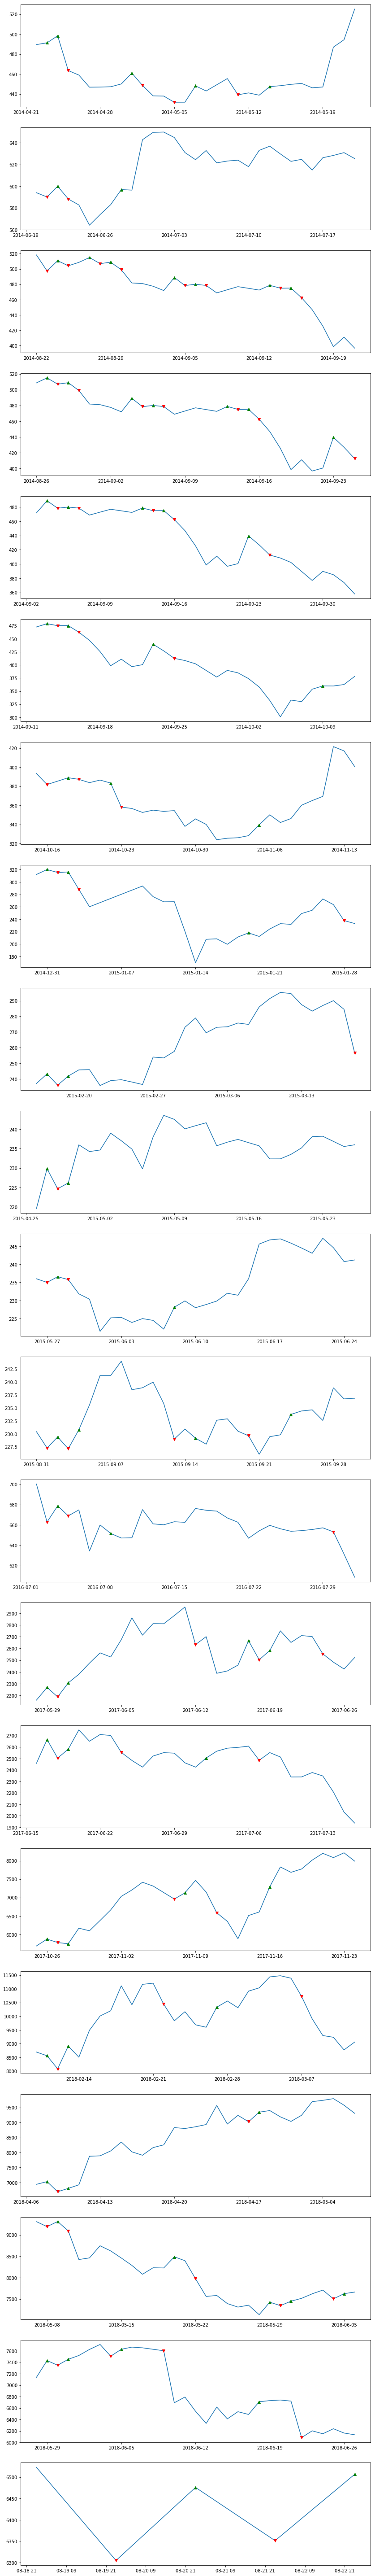

In [77]:
fig, ax = plt.subplots(len(dates),1, figsize=(14,len(dates)*5))

for i, d in enumerate(dates):
    p.plot(start_date=d, end_date=d + datetime.timedelta(days = 30), ax=ax[i]);